In [1]:
# 1. Choose value for K
# 2. Randomly select K featuresets to start as your centroids
# 3. Calculate distance of all other featuresets to centroids
# 4. Classify other featuresets as same as closest centroid
# 5. Take mean of each class (mean of all featuresets by class), making that mean the new centroid
# 6. Repeat steps 3-5 until optimized (centroids no longer moving)

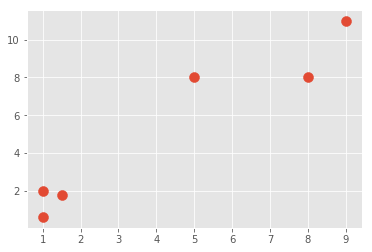

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=100)
plt.show();

In [8]:
#It should be obvious where our clusters are. 
#We're going to be choosing K=2. We will begin building our K Means class:

We just set up some starting values here, k is ...well... k. 
The tol value is our tolerance, which will allow us to say we're optimized if the centroid is not moving 
more than the tolerance value.
The max_iter value is to limit the number of cycles we're willing to run.
Now we'll begin working on the fit method:


To begin, we know we just need to pass whatever data we're fitting to. We then begin an empty dictionary, which will soon house our centroids. Next, we begin a for loop which simply assigns our starting centroids as the first two data samples in our data. If you wanted to truly select randomly the starting centroids, you could first shuffle the data, but this should be fine.


Now we begin iterating through our max_iter value. While here, we start with empty classifications, and then create two dict keys (by iterating through range of self.k).


Next, we're going to need to create the new centroids, as well as measuring the movement of the centroids. If that movement is less than our tolerance (self.tol), then we're all set. Including that addition, full code up to this point:

In [40]:
class K_Means:
    
    def __init__(self, k=2, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]


        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]

            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                optimized = False
            
            if optimized:
                break
                
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification           

453.3333333333334
102.72108843537411


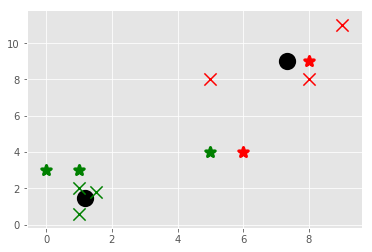

In [49]:
colors = 10*["g","r","c","b","k"]
clf = K_Means(k=2)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
 


#How about we test the predictions next?
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=100, linewidths=3)


plt.show()